# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [126]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Подобрал на кагле сет производителей стали "Top 100 Global Steel Producers (2011-2016)"

Так как со сталью много работаю, интересно узнать для расширения кругозора.

In [3]:
steel = pd.read_csv("Top 100 Global Steel Producers (2011-2016).csv", encoding='1251') #downloaded from "https://www.kaggle.com/drubal/top-100-global-steel-producers-20112016"
steel.head()

,Companies,Headquarters,2011 Tonnage (Millions),2012 Tonnage (Millions),2013 Tonnage (Millions),2014 Tonnage (Millions),2015 Tonnage (Millions),2016 Tonnage (Millions),2015 Ranking,2016 Ranking
0,ArcelorMittal,Luxembourg,97.25,93.58,96.10,98.09,97.14,95.45,1.0,1.0
1,China Baowu Group (merger of Baosteel Group an...,China,81.02,79.12,83.22,76.40,60.71,63.81,NaN,2.0
2,HBIS Group,China,44.36,42.84,45.79,47.09,47.75,46.18,2.0,3.0
3,Nippon Steel and Sumitomo Metal Corporation,Japan,33.39,47.86,50.13,49.30,46.37,46.16,3.0,4.0
4,POSCO,South Korea,39.12,39.88,38.42,41.59,41.97,41.56,4.0,5.0


In [33]:
steel.describe()

,2011 Tonnage (Millions),2012 Tonnage (Millions),2013 Tonnage (Millions),2014 Tonnage (Millions),2015 Tonnage (Millions),2016 Tonnage (Millions),2015 Ranking,2016 Ranking
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,91.000000,98.000000
mean,11.040300,11.328000,12.113800,12.46410,12.104200,11.64640,46.758242,49.500000
std,15.222306,15.049308,15.469211,15.09306,13.828638,13.53232,26.796493,28.434134
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,1.000000
25%,2.762500,3.242500,3.430000,3.90750,4.475000,4.47250,24.500000,25.250000
50%,6.365000,7.020000,7.625000,7.94000,7.600000,7.10000,47.000000,49.500000
75%,13.627500,13.847500,14.292500,14.63000,14.342500,13.90000,68.500000,73.750000
max,97.250000,93.580000,96.100000,98.09000,97.140000,95.45000,94.000000,98.000000


In [32]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Companies                100 non-null    object 
 1   Headquarters             100 non-null    object 
 2   2011 Tonnage (Millions)  100 non-null    float64
 3   2012 Tonnage (Millions)  100 non-null    float64
 4   2013 Tonnage (Millions)  100 non-null    float64
 5   2014 Tonnage (Millions)  100 non-null    float64
 6   2015 Tonnage (Millions)  100 non-null    float64
 7   2016 Tonnage (Millions)  100 non-null    float64
 8   2015 Ranking             91 non-null     Int64  
 9   2016 Ranking             98 non-null     Int64  
dtypes: Int64(2), float64(6), object(2)
memory usage: 8.1+ KB


In [384]:
# --- Поменяем подозрительных типов

steel['2016 Ranking'] = steel['2016 Ranking'].astype('Int64')
steel['2015 Ranking'] = steel['2015 Ranking'].astype('Int64')

In [410]:
#--- Сколько всего компаний в каждой стране?

steel.Headquarters.value_counts()

China            54
Russia            6
India             6
Japan             4
USA               3
South Korea       3
Brazil            3
Germany           2
Sweden            2
Ukraine           2
Luxembourg        2
Turkey            2
Iran              1
Australia         1
Argentina         1
Egypt             1
Austria           1
Spain             1
KSA               1
Taiwan, China     1
Mexico            1
UAE               1
Italy             1
Name: Headquarters, dtype: int64

## Сделаем общий анализ производителей. 
Для этого используем столбиковую диаграмму.

In [55]:
#--- Сгруппируем по Штаб Квартире (Headquarters),
#---                     добавим столбцы с производством стали по годам 
#---                     и отсортируем:

steel_countries = steel[ ['Headquarters'] + [x for x in steel.columns if 'Tonnage' in x ] ].groupby('Headquarters').sum()
steel_countries.sort_values(by = '2016 Tonnage (Millions)', ascending = False, inplace = True)
steel_countries.head(3)

,2011 Tonnage (Millions),2012 Tonnage (Millions),2013 Tonnage (Millions),2014 Tonnage (Millions),2015 Tonnage (Millions),2016 Tonnage (Millions)
Headquarters,,,,,,
China,556.78,559.42,614.28,631.80,622.80,572.09
Luxembourg,97.25,93.58,103.69,105.85,103.35,100.92
Japan,74.44,89.17,92.52,92.35,87.54,87.36


<AxesSubplot:title={'center':'Fig.1. Top 7 Global Steel producers by Headquarters Countries'}, xlabel='Countries', ylabel='Volume of steel production, million kg'>

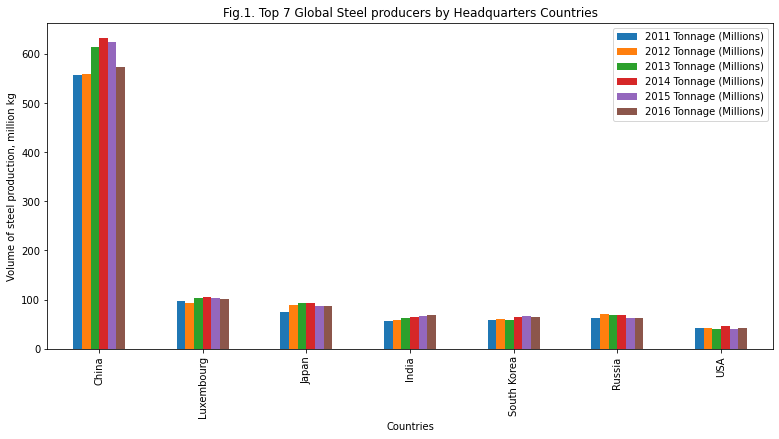

In [61]:
steel_countries.head(7).plot(kind='bar', title = 'Fig.1. Top 7 Global Steel producers by Headquarters Countries', xlabel = 'Countries', ylabel = 'Volume of steel production, million kg' )

### Из Figure 1(Fig.1) можно сделать выводы:
- с 2011 по 2016 Китай по производству стали занимал 1-ое место,
- Люксембург не может производить столько стали, скорее всего штаб квартира расположена в Люксембурге (с большой вероятностью для минимизации налогов), а производство стали расположено в другой географической точке,
- можно определить тенденцию каждой страны ,
 - Китай снижает объем производства,
 - Люксембург,Россия, Южная Корея и США объем производства не меняется,
 - Япония - тенденция роста объема производства
 - Индия - объем производства растет
 
 

In [205]:
#--- Посмотрим как обстоят дел в каждой стране. Начнем с лидера производства - Китай:

steel_china = steel.loc[ steel['Headquarters'].str.contains('China'), ['Companies'] + 
                        [x for x in steel.columns if 'Tonnage' in x]]
steel_china.columns = ['Companies', '2011', '2012', '2013', '2014', '2015', '2016']
steel_china.head(2)

,Companies,2011,2012,2013,2014,2015,2016
1,China Baowu Group (merger of Baosteel Group an...,81.02,79.12,83.22,76.40,60.71,63.81
2,HBIS Group,44.36,42.84,45.79,47.09,47.75,46.18


In [204]:
#--- Сколько всего компаний в Китае:

len(steel_china.Companies)

55

In [218]:
# 55 компаний трудно отобразить на графике. Возьмем 5 самых крупных:

steel_china.sort_values(by = ['2016', '2015', '2014'], ascending = False, inplace = True)
steel_china.head(3)
steel_china_T = steel_china.set_index('Companies').head(5).T

In [383]:
#Сколько всего стали произведено в Китае: 

china_volume = pd.DataFrame(steel_china.drop('Companies', axis = 1).sum())


<AxesSubplot:title={'center':'Fig.2. Top 5 China Steel producers (Headquarters in China)'}, xlabel='Year', ylabel='Volume of steel production, million kg'>

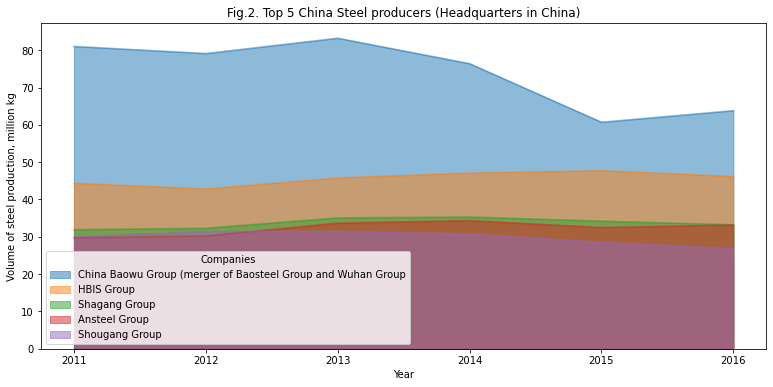

In [215]:
#--- Покажем изменение компаний в составе Китая: 
steel_china_T.plot( kind = 'area', 
                      stacked = False, 
                      title='Fig.2. Top 5 China Steel producers (Headquarters in China)', 
                      xlabel='Year', 
                      ylabel='Volume of steel production, million kg')

# Не знаю почему не рисует общее производство стали на одном графике..
#
# china_volume[0].plot(title='Fig.2. Top 5 China Steel producers (Headquarters in China)', 
#                       xlabel='Year', 
#                       ylabel='Volume of steel production, million kg')
#ax = plt.plot( china_volume.index , china_volume[0] ) 

### По графику 2. (Fig.2) Top 5 China Steel producers можно сделать выводы:
- В Китае существуют 3 самые крупные компании, которые сильно по объему производства стали отличаются от других  - Baowu, Shougang, HBIS
- Лидер отрасли до 2015 года Baowu, после 2015 года Shoungang 

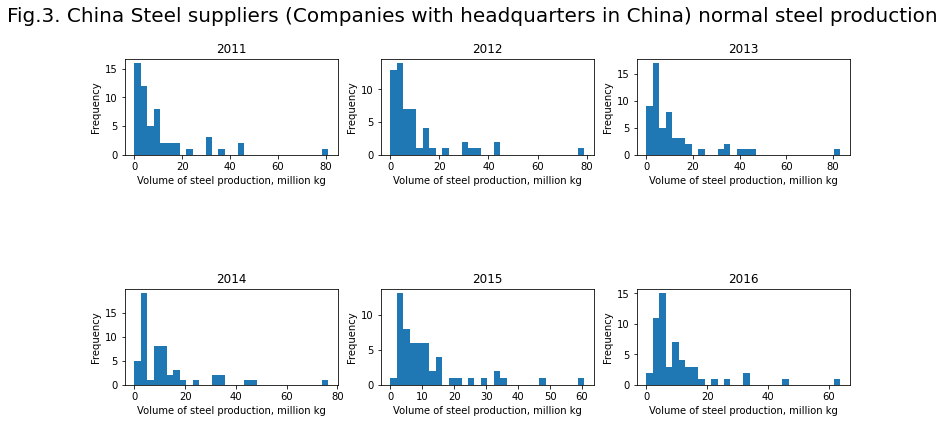

In [376]:
#--- Рассмотрим распределение компаний по производству стали в Китае

fig = plt.figure()
fig.suptitle('Fig.3. China Steel suppliers (Companies with headquarters in China) normal steel production ',
             y = 1,
             fontsize = 20)

ax_1 = fig.add_subplot(331)
ax_1.set(title = 2011, xlabel = 'Volume of steel production, million kg') 
ax_1 = steel_china.set_index('Companies')['2011'].plot( kind = 'hist' , bins = 30)  

ax_2 = fig.add_subplot(332)
ax_2.set(title = 2012, xlabel = 'Volume of steel production, million kg')  
ax_2 = steel_china.set_index('Companies')['2012'].plot( kind = 'hist' , bins = 30)  

ax_3 = fig.add_subplot(333)
ax_3.set(title = 2013, xlabel = 'Volume of steel production, million kg')  
ax_3 = steel_china.set_index('Companies')['2013'].plot( kind = 'hist' , bins = 30)  

ax_4 = fig.add_subplot(337)
ax_4.set(title = 2014, xlabel = 'Volume of steel production, million kg')  
ax_4 = steel_china.set_index('Companies')['2014'].plot( kind = 'hist' , bins = 30)  

ax_5 = fig.add_subplot(338)
ax_5.set(title = 2015, xlabel = 'Volume of steel production, million kg')  
ax_5 = steel_china.set_index('Companies')['2015'].plot( kind = 'hist' , bins = 30)  

ax_6 = fig.add_subplot(339)
ax_6.set(title = 2016, xlabel = 'Volume of steel production, million kg')  
ax_6 = steel_china.set_index('Companies')['2016'].plot( kind = 'hist' , bins = 30)  


### По графику 3. (Fig.3)China Steel suppliers normal production  можно сделать выводы:
- Распределение производителей стали не нормальное с большим правым хвостом 
- Мода около 2 тыс.т. не меняется по годам
- Среднее отклонение 10 тыс.т.
- явно выраженные выбросы 80 и 60 тыс.т.

<AxesSubplot:title={'center':' Fig.4. China Steel suppliers (Companies with headquarters in China) normal steel production  '}, ylabel='steel production, million kg'>

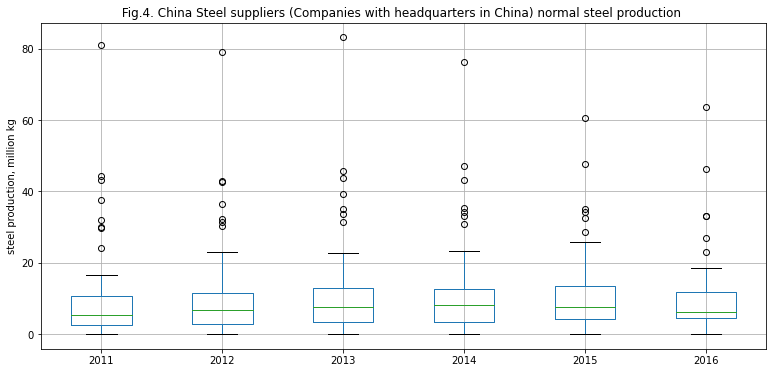

In [382]:
#--- И ящик с усами чтобы убедиться что из всех компаний по производству стали в Китае только 1-3 делают всю кассу 

steel_china.plot(kind = 'box' , 
                 title = ' Fig.4. China Steel suppliers (Companies with headquarters in China) normal steel production  ',
                 ylabel = 'steel production, million kg',
                 grid = True)

### По графику 4. (Fig.4)China Steel suppliers normal production можно убедиться в правильности выводов графика 3:
- Очень много выбросов над ящиком
- нижняя часть коробки, как правило, меньше чем верхняя часть - это говорит о большом перевесе мелких производителей
- Коробка опущена вниз - тот же вывод - много мелких производителей.
- 1 компания делает труба шатает сталепроизводство в Китае.


## Как обстоят дела в других Top 5 странах?
### Далее по списку Люксембург:

In [387]:
#--- Люксембург:

steel_lux = steel.loc[ steel['Headquarters'].str.contains('Luxembourg'), ['Companies'] + 
                        [x for x in steel.columns if 'Tonnage' in x]]
steel_lux.columns = ['Companies', '2011', '2012', '2013', '2014', '2015', '2016']
steel_lux

,Companies,2011,2012,2013,2014,2015,2016
0,ArcelorMittal,97.25,93.58,96.10,98.09,97.14,95.45
65,RIVA Group,0.00,0.00,7.59,7.76,6.21,5.47


In [397]:
#--- Покажем изменение компаний в составе Люксембурга: 
steel_lux_T = steel_lux.set_index('Companies').T
steel_lux_T

Companies,ArcelorMittal,RIVA Group
2011,97.25,0.00
2012,93.58,0.00
2013,96.10,7.59
2014,98.09,7.76
2015,97.14,6.21
2016,95.45,5.47


<AxesSubplot:title={'center':'Fig.5. Headquarters in Luxemburg Steel producers'}, xlabel='Year', ylabel='Volume of steel production, million kg'>

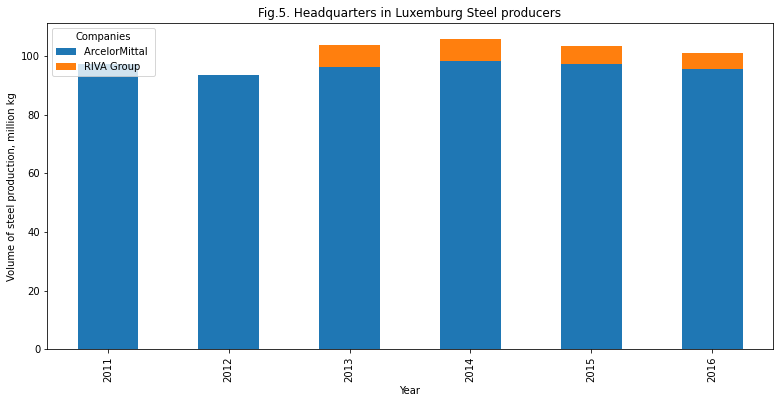

In [396]:
steel_lux_T.plot( kind = 'bar', 
                      stacked = True, 
                      title='Fig.5. Headquarters in Luxemburg Steel producers', 
                      xlabel='Year', 
                      ylabel='Volume of steel production, million kg')

### По графику 5. (Fig.5) Headquarters in Luxemburg Steel producers можно сделать выводы:
- В люксембурге всю продукцию создает только одна компания "ArcelorMittal" 
- Если сопоставить объем самого большого поставщика стали из Китая - 80 -60 млн.т. с поставщиком стали из Люксембурга 90-100 млн.т, напрашивается вывод - один производитель стали в Люксембурге на 25% в среднем производит стали больше, чем самый большой поставщик стали в Китае. Соответственно имеел смысл выводить Штаб квартиру в Люксембург.

### Далее по списку Япония:

In [398]:
#--- Япония:

steel_japan = steel.loc[ steel['Headquarters'].str.contains('Japan'), ['Companies'] + 
                        [x for x in steel.columns if 'Tonnage' in x]]
steel_japan.columns = ['Companies', '2011', '2012', '2013', '2014', '2015', '2016']
steel_japan

,Companies,2011,2012,2013,2014,2015,2016
3,Nippon Steel and Sumitomo Metal Corporation,33.39,47.86,50.13,49.30,46.37,46.16
8,JFE Steel Corporation,29.90,30.41,31.16,31.41,29.83,30.29
51,"Kobe Steel, Ltd.",7.39,7.09,7.53,7.57,7.52,7.26
84,"Nisshin Steel Co., Ltd. (acquired by NSSMC in ...",3.76,3.81,3.70,4.07,3.82,3.65


In [399]:
steel_japan_T = steel_japan.set_index('Companies').T
steel_japan_T

Companies,Nippon Steel and Sumitomo Metal Corporation,JFE Steel Corporation,"Kobe Steel, Ltd.","Nisshin Steel Co., Ltd. (acquired by NSSMC in March 2017)"
2011,33.39,29.90,7.39,3.76
2012,47.86,30.41,7.09,3.81
2013,50.13,31.16,7.53,3.70
2014,49.30,31.41,7.57,4.07
2015,46.37,29.83,7.52,3.82
2016,46.16,30.29,7.26,3.65


<AxesSubplot:title={'center':'Fig.6. Headquarters in Japan Steel producers'}, xlabel='Year', ylabel='Volume of steel production, million kg'>

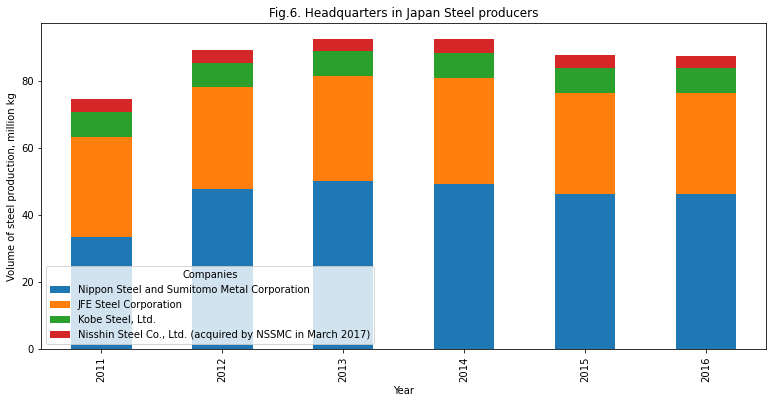

In [400]:
steel_japan_T.plot( kind = 'bar', 
                      stacked = True, 
                      title='Fig.6. Headquarters in Japan Steel producers', 
                      xlabel='Year', 
                      ylabel='Volume of steel production, million kg')

### По графику 5. (Fig.5) Headquarters in Japan Steel producers можно сделать выводы:
- В Японии, в отличие от Люксембурга, всю продукцию создает несколько компаний 1. "Nippon Steel", 2. "JFE Steel" 
- Два поставщика из Японии производят такой же объем стали, как самый большой поставщик стали из Китая - 80 -60 млн.т. 

### Далее по списку Индия:

In [402]:
#--- Индия:

steel_india = steel.loc[ steel['Headquarters'].str.contains('India'), ['Companies'] + 
                        [x for x in steel.columns if 'Tonnage' in x]]
steel_india.columns = ['Companies', '2011', '2012', '2013', '2014', '2015', '2016']
steel_india

,Companies,2011,2012,2013,2014,2015,2016
10,Tata Steel Group,23.82,22.97,25.27,26.20,26.31,24.49
22,JSW Steel Limited,7.01,8.48,11.80,12.72,12.42,14.91
24,Steel Authority of India Ltd.,13.50,13.50,13.52,13.56,14.34,14.38
49,Essar Steel Group,6.82,6.70,6.09,5.50,5.66,7.45
81,Rashtriya Ispat Nigam Ltd (VIZAG Steel),3.19,3.11,3.11,3.28,3.64,3.82
90,Jindal Steel and Power Ltd,2.62,2.73,2.87,2.95,3.08,3.48


In [403]:
steel_india_T = steel_india.set_index('Companies').T
steel_india_T

Companies,Tata Steel Group,JSW Steel Limited,Steel Authority of India Ltd.,Essar Steel Group,Rashtriya Ispat Nigam Ltd (VIZAG Steel),Jindal Steel and Power Ltd
2011,23.82,7.01,13.50,6.82,3.19,2.62
2012,22.97,8.48,13.50,6.70,3.11,2.73
2013,25.27,11.80,13.52,6.09,3.11,2.87
2014,26.20,12.72,13.56,5.50,3.28,2.95
2015,26.31,12.42,14.34,5.66,3.64,3.08
2016,24.49,14.91,14.38,7.45,3.82,3.48


<AxesSubplot:title={'center':'Fig.7. Headquarters in India Steel producers'}, xlabel='Year', ylabel='Volume of steel production, million kg'>

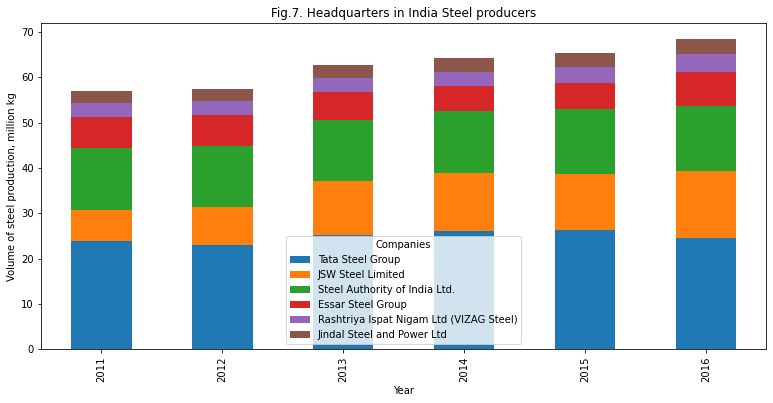

In [405]:
steel_india_T.plot( kind = 'bar', 
                      stacked = True, 
                      title='Fig.7. Headquarters in India Steel producers', 
                      xlabel='Year', 
                      ylabel='Volume of steel production, million kg')

### По диаграмме 7. (Fig.7) Headquarters in India Steel producers можно сделать выводы:
- В Индии, в отличие от Люксембурга и Китая, всю продукцию создает несколько компаний 1. "Tata Steel", 2. "Steel Authority", 3. "JSW Steel"
- Рост производства стали в Индии растет из-за роста производства в компании "JSW Steel" 

### Далее по списку Россия:

In [406]:
#--- Россия:

steel_rus = steel.loc[ steel['Headquarters'].str.contains('Russia'), ['Companies'] + 
                        [x for x in steel.columns if 'Tonnage' in x]]
steel_rus.columns = ['Companies', '2011', '2012', '2013', '2014', '2015', '2016']
steel_rus

,Companies,2011,2012,2013,2014,2015,2016
17,Novolipetsk Steel,12.11,14.92,15.47,16.11,16.05,16.64
29,EVRAZ,16.77,15.95,16.11,15.54,14.35,13.53
30,Magnitogorsk Iron & Steel Works,12.20,13.04,11.94,13.03,12.24,12.54
32,Severstal,15.29,15.14,15.69,14.23,11.45,11.63
73,Metalloinvest Management Company,5.82,5.61,4.68,4.50,4.50,4.66
78,Mechel,0.00,6.53,4.65,4.27,4.32,4.19


In [407]:
steel_rus_T = steel_rus.set_index('Companies').T
steel_rus_T

Companies,Novolipetsk Steel,EVRAZ,Magnitogorsk Iron & Steel Works,Severstal,Metalloinvest Management Company,Mechel
2011,12.11,16.77,12.20,15.29,5.82,0.00
2012,14.92,15.95,13.04,15.14,5.61,6.53
2013,15.47,16.11,11.94,15.69,4.68,4.65
2014,16.11,15.54,13.03,14.23,4.50,4.27
2015,16.05,14.35,12.24,11.45,4.50,4.32
2016,16.64,13.53,12.54,11.63,4.66,4.19


<AxesSubplot:title={'center':'Fig.8. Headquarters in Russia Steel producers'}, xlabel='Year', ylabel='Volume of steel production, million kg'>

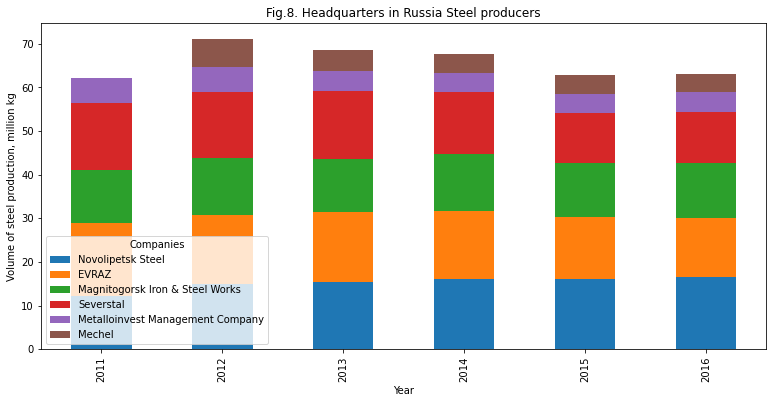

In [409]:
steel_rus_T.plot( kind = 'bar', 
                      stacked = True, 
                      title='Fig.8. Headquarters in Russia Steel producers', 
                      xlabel='Year', 
                      ylabel='Volume of steel production, million kg')

### По диаграмме 8. (Fig.8) Headquarters in Russia Steel producers можно сделать выводы:
- В Индии, в отличие от Люксембурга и Китая, всю продукцию создают несколько компаний 1. "Novolipetsk Steel", 2. "EVRAZ", 3. "Magnitogorsk", 4."Severstal" 
- Нет явного лидера рынка, 4 топ компании в сумме производят меньше одного самого крупного производителя стали в Китае. 

## Сравим всех поставщиков стали
Для этого составлю сводную таблицу и heatmap

In [411]:
steel.head()

,Companies,Headquarters,2011 Tonnage (Millions),2012 Tonnage (Millions),2013 Tonnage (Millions),2014 Tonnage (Millions),2015 Tonnage (Millions),2016 Tonnage (Millions),2015 Ranking,2016 Ranking
0,ArcelorMittal,Luxembourg,97.25,93.58,96.10,98.09,97.14,95.45,1,1
1,China Baowu Group (merger of Baosteel Group an...,China,81.02,79.12,83.22,76.40,60.71,63.81,<NA>,2
2,HBIS Group,China,44.36,42.84,45.79,47.09,47.75,46.18,2,3
3,Nippon Steel and Sumitomo Metal Corporation,Japan,33.39,47.86,50.13,49.30,46.37,46.16,3,4
4,POSCO,South Korea,39.12,39.88,38.42,41.59,41.97,41.56,4,5


In [465]:
steel_renamed = steel.rename(columns = {'2011 Tonnage (Millions)':'2011',
                                       '2012 Tonnage (Millions)':'2012',
                                       '2013 Tonnage (Millions)':'2013',
                                       '2014 Tonnage (Millions)':'2014',
                                       '2015 Tonnage (Millions)':'2015',
                                       '2016 Tonnage (Millions)':'2016'})
steel_renamed.drop('2015 Ranking', axis=1, inplace = True)
steel_renamed.drop('2016 Ranking', axis=1, inplace = True)

#steel_renamed.sort_values(by = '2016', ascending = False, inplace = True)

steel_renamed.head()

,Companies,Headquarters,2011,2012,2013,2014,2015,2016
0,ArcelorMittal,Luxembourg,97.25,93.58,96.10,98.09,97.14,95.45
1,China Baowu Group (merger of Baosteel Group an...,China,81.02,79.12,83.22,76.40,60.71,63.81
2,HBIS Group,China,44.36,42.84,45.79,47.09,47.75,46.18
3,Nippon Steel and Sumitomo Metal Corporation,Japan,33.39,47.86,50.13,49.30,46.37,46.16
4,POSCO,South Korea,39.12,39.88,38.42,41.59,41.97,41.56


In [475]:
steel_renamed_grouped = steel_renamed.groupby('Headquarters').sum()
steel_renamed_grouped.sort_values(by = '2016', ascending = False, inplace = True)
steel_renamed_grouped = steel_renamed_grouped.T
steel_renamed_grouped

Headquarters,China,Luxembourg,Japan,India,South Korea,Russia,USA,Brazil,Germany,"Taiwan, China",...,Sweden,Argentina,Austria,Spain,Italy,Australia,KSA,Mexico,Egypt,UAE
2011,556.78,97.25,74.44,56.96,58.48,62.19,41.88,32.21,23.60,14.01,...,7.35,9.53,7.67,7.84,0.00,6.00,5.28,3.81,4.32,0.00
2012,559.42,93.58,89.17,57.49,60.31,71.19,41.57,31.61,20.55,12.73,...,6.93,8.71,7.36,7.62,0.00,4.23,5.20,3.88,4.56,2.38
2013,614.28,103.69,92.52,62.66,59.05,68.54,40.54,30.31,21.44,14.29,...,8.54,9.00,8.02,6.99,5.68,4.20,5.47,4.16,4.33,2.88
2014,631.80,105.85,92.35,64.21,65.21,67.68,47.09,30.46,22.97,15.40,...,11.48,9.38,7.95,7.03,6.22,4.10,6.29,4.42,4.01,2.39
2015,622.80,103.35,87.54,65.45,65.77,62.91,40.31,27.20,23.99,14.82,...,10.30,8.40,7.76,7.08,4.76,4.52,5.23,4.46,3.28,3.01
2016,572.09,100.92,87.36,68.53,64.94,63.19,41.22,24.07,24.04,15.52,...,11.19,7.98,7.47,6.94,5.67,5.63,5.27,4.65,3.66,3.15


Text(0.5, 1.1, 'Fig.9. Global Steel suppliers normal steel production')

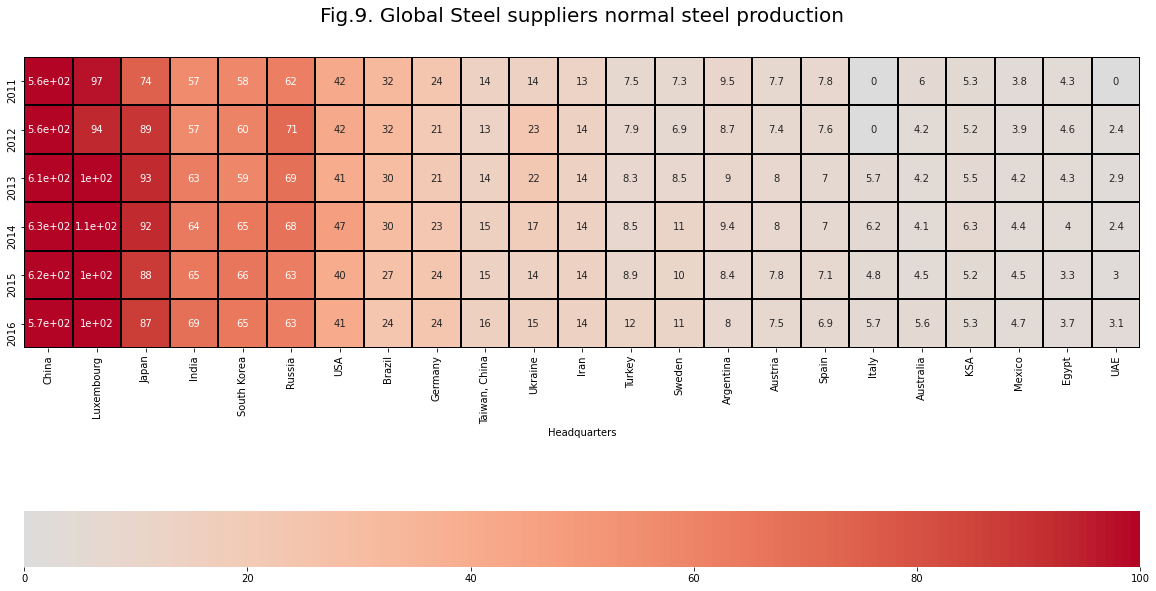

In [478]:
plt.figure(figsize=(20, 20))

ax1 = sns.heatmap(steel_renamed_grouped, 
            annot = True, 
            center = 0 , 
            cmap = 'coolwarm',
            vmax = 100,
            square = True, 
            cbar_kws = {'orientation': 'horizontal'},
            #cbar = False,
            linewidths = 1, 
            linecolor = 'black')

ax1.set_title('Fig.9. Global Steel suppliers normal steel production',
             y = 1.1,
             fontsize = 20)


Как другой вариант (не самый лучший, но чтобы попробовать применить) представления ранжирования глобальных игроков рынка производства стали. 
- Страны  каждый год производили примерно равный в среднем объем стали. 
- Украина может поставлять больше стали (в одно время поставляла 23 млн.т. стали)

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.